In [14]:
import PyPDF2
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

In [49]:
pdf_file = open('Master_final_national_curriculum_28_Nov.pdf', 'rb')
pdf_read = PyPDF2.PdfFileReader(pdf_file)
print('The pdf has {} pages'.format(pdf_read.numPages))
start_page = int(input('Which page do you want to start reading from'))
end_page = int(input('Which page do you want to stop reading from')) 

The pdf has 264 pages


<AxesSubplot:xlabel='Word'>

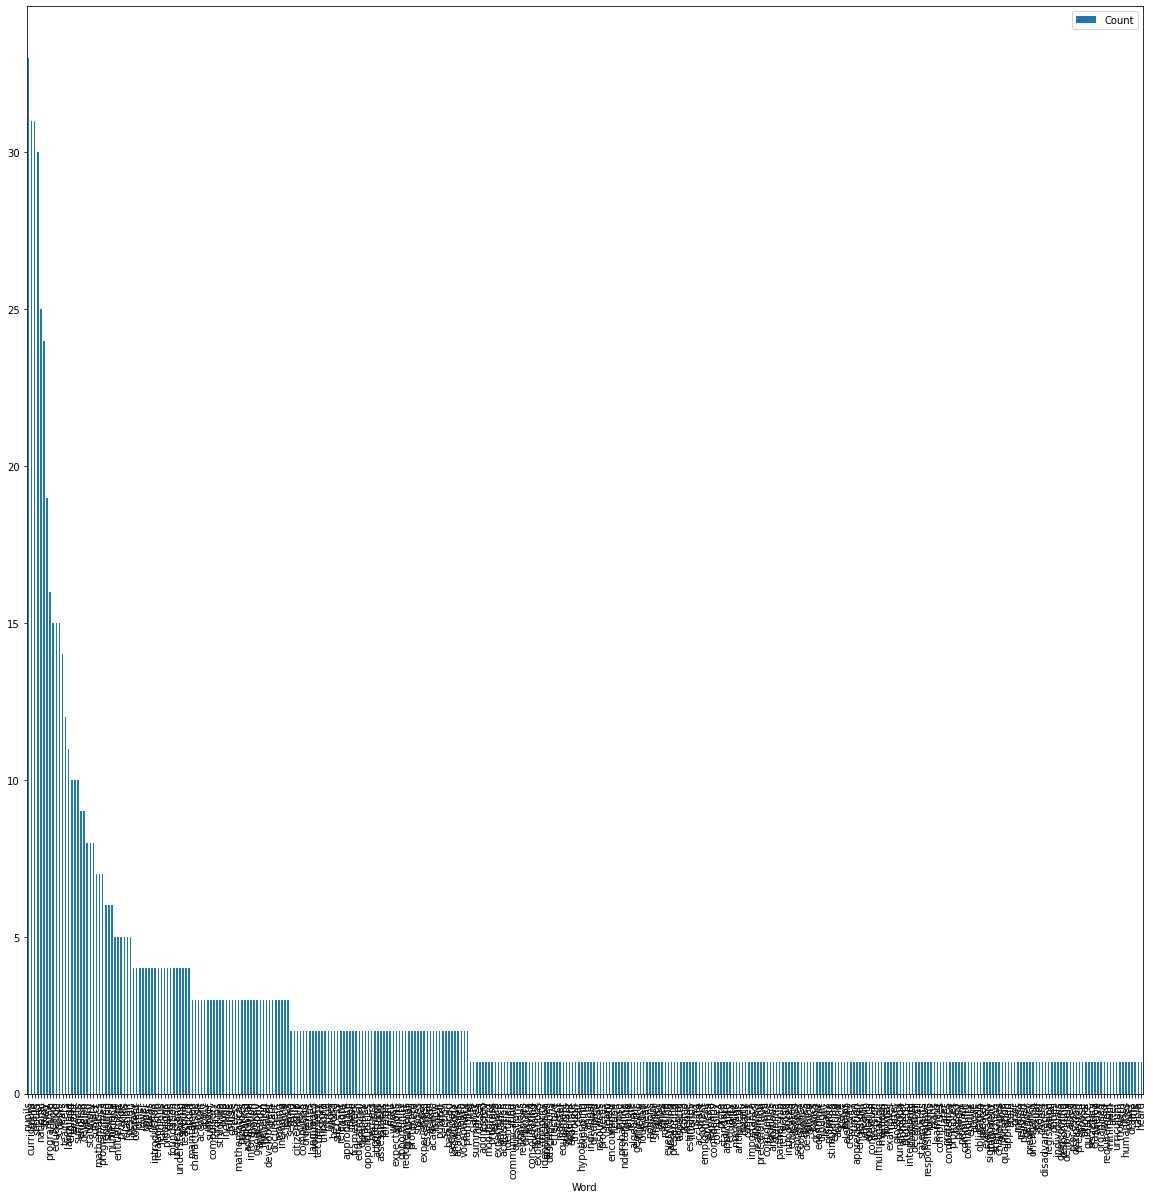

In [50]:
def pdf_to_list_of_words(pdf_read, start_page, end_page):
    list_of_words_only = []
    for page in range(abs(end_page-start_page)):
        page_text_string = pdf_read.getPage(page).extractText()
        page_text_string.replace("\n", " ")
        list_of_words_or_numbers = page_text_string.split()
        list_of_words_only += [item.lower() for item in list_of_words_or_numbers if item.isalpha()]

    dict_count_words = Counter(list_of_words_only)
    df_count_words = pd.DataFrame(dict_count_words.items(), columns=['Word', 'Count'])
    df_count_words_sorted = df_count_words.sort_values(by = ['Count'], ascending=False)
    return df_count_words_sorted


df_word_count = pdf_to_list_of_words(pdf_read, start_page, end_page)
df_word_count_mask = df_word_count['Word'].str.len() > 4
df_word_count = df_word_count.loc[df_word_count_mask]
fig, ax = plt.subplots(1,1, figsize=(20,20))

df_word_count.plot(ax=ax, x='Word', y='Count', kind='bar')
